# First Section : Clustering

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [133]:
# Read Data

market_best = pd.read_csv("Q1_data.csv")

## Part 0
### Data Visualization of Top Cryptocurrencies Over One Year

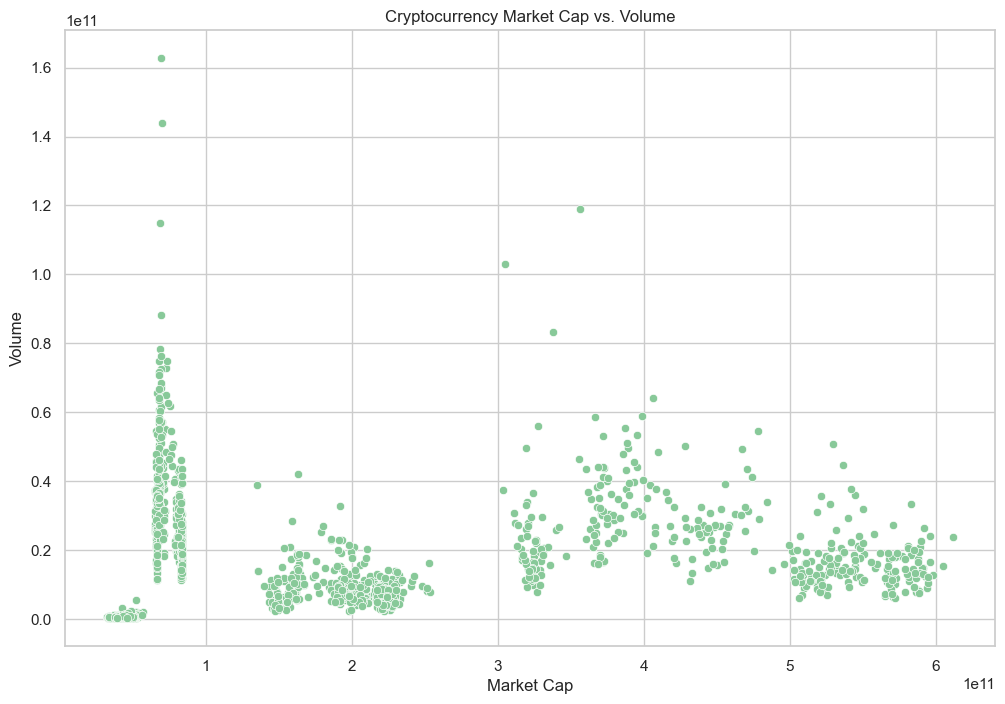

In [134]:
# Data Visualization of Top Cryptocurrencies Over One Year by Plotting its Scatter Plot

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')


sns.scatterplot(x=market_best['market_cap'], y=market_best['volume'], color = '#88c999')

# Customize the plot
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.title('Cryptocurrency Market Cap vs. Volume')

# Show the plot
plt.show()

## Part 1
### K-means Clustering with 5 Clusters

In [114]:
# K-means Clustering of Cryptocurrencies with 5 Clusters Based on Market Cap and Volume
clustering_features = market_best[['market_cap', 'volume']]
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0).fit(clustering_features)
K_centroids = kmeans.cluster_centers_
K_labels = kmeans.labels_

c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


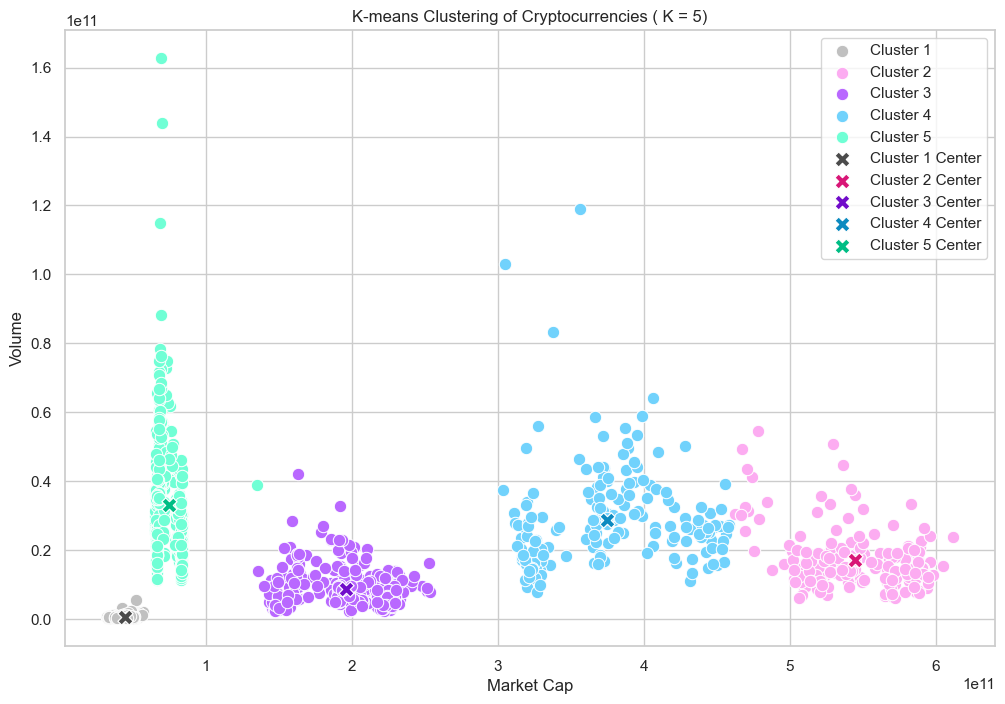

In [116]:
# Visualization

# Create a list of colors for the clusters and their centers
cluster_colors = ['#C0C0C0', '#FCACF1', '#B968FF', '#71D2FC', '#70FFD5']
centroids_colors = ['#4B4B4B', '#D81677', '#710CCA', '#0C8AC0', '#00BD84']

# Create a Seaborn scatter plot for each cluster with borders
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Plot the clusters
for cluster_label, color in enumerate(cluster_colors):
    cluster_data = clustering_features[K_labels == cluster_label]
    sns.scatterplot(x=cluster_data['market_cap'], y=cluster_data['volume'],
                label=f'Cluster {cluster_label+1}' ,color=color, s=80)

# Plot the clusters' centers
for i, center in enumerate(K_centroids):
    sns.scatterplot(x=[center[0]], y=[center[1]], color=centroids_colors[i], marker='X', s=120, label=f'Cluster {i+1} Center')

# Customize the plot
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.title('K-means Clustering of Cryptocurrencies ( K = 5)')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [92]:
# Part 2

## Part 3
### DBScan Clustering with 5  Meaningful Clusters

In [135]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [136]:
dbclustering_features = market_best[['market_cap', 'volume']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dbclustering_features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)


C:\Users\darfa\AppData\Local\Temp\ipykernel_17732\3864680537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbclustering_features['cluster'] = dbscan.fit_predict(scaled_features)


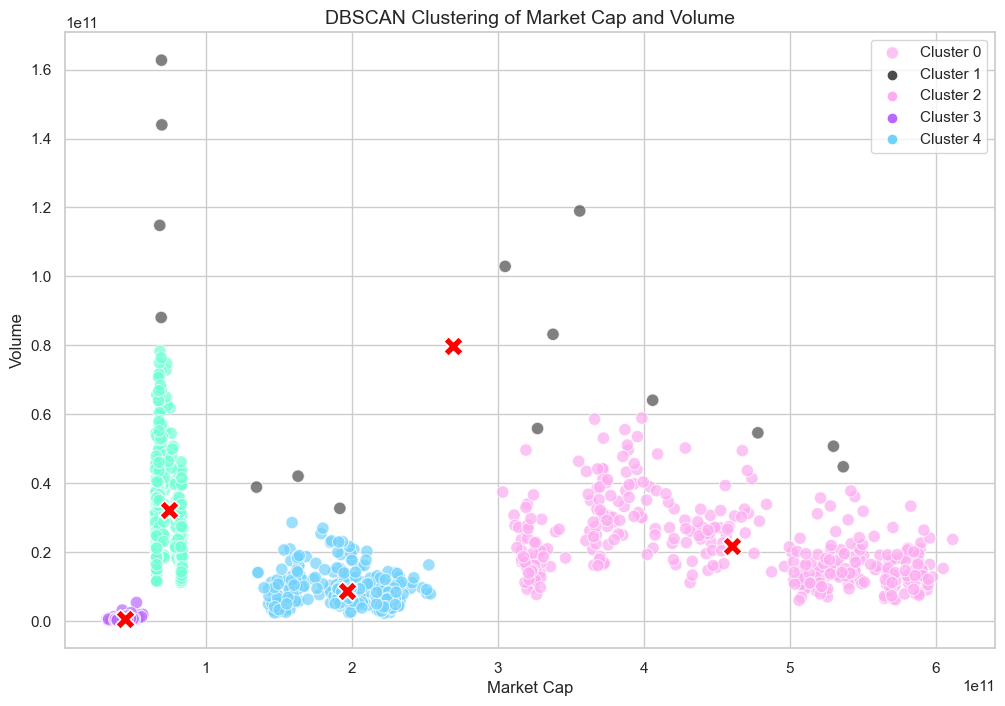

In [148]:
# Visualization

# Add the cluster labels to the DataFrame
dbclustering_features['cluster'] = dbscan.fit_predict(scaled_features)

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Plot the scatter plot
scatter = sns.scatterplot(x='market_cap', y='volume', hue='cluster', palette=cluster_colors, data=dbclustering_features, alpha=0.7, s=80)

# Highlight cluster centers
db_centroids = dbclustering_features.groupby('cluster').mean()[['market_cap', 'volume']]
sns.scatterplot(x=db_centroids['market_cap'], y=db_centroids['volume'], color='red', marker='X', s=200)


# Set plot labels and title
plt.xlabel('Market Cap', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.title('DBSCAN Clustering of Market Cap and Volume', fontsize=14)

# Add a legend
legend_labels = [f'Cluster {i}' for i in range(dbclustering_features['cluster'].nunique())]
scatter = scatter.legend(labels=legend_labels, loc='upper right')

# Show the plot
plt.show()

<h4 align=center style="line-height:300%;font-family:vazir;color:#CCFF0B">
<font face="vazir" color="#CCFF0B">
نحوه‌ی اثرگذاری هر یک از هایپرپارامتر‌ها بر خروجی
</font>
</h4>

<div dir="rtl">
<p align=right style="line-height:300%;font-family:vazir;color:white">

eps (epsilon): اپسیلون حداکثر فاصله بین دو نقطه داده را برای در نظر گرفتن آنها در یک همسایگی تعریف می کند. نقاطی که در این فاصله قرار دارند به طور مستقیم قابل دسترسی در نظر گرفته می شوند. افزایش ارزش اپسیلون منجر به در نظر گرفتن نقاط بیشتری در یک همسایگی می شود که به طور بالقوه منجر به خوشه های بزرگتر می شود. برعکس، کاهش اپسیلون منجر به خوشه‌های کوچک‌تر و فشرده‌تر می‌شود.

min_samples: Min_samples حداقل تعداد نقاط داده مورد نیاز برای تشکیل یک نقطه اصلی را مشخص می کند. نقطه مرکزی نقطه‌ای است که حداقل تعداد نمونه‌ای از نقاط را در همسایگی اپسیلون خود (از جمله خود نقطه) داشته باشد. افزایش min_samples به امتیازهای بیشتری نیاز دارد تا یک خوشه تشکیل شود و در مجموع خوشه های کمتری ایجاد شود. کاهش min_samples به تشکیل خوشه‌های کوچک‌تر اجازه می‌دهد که به طور بالقوه منجر به خوشه‌های بیشتر شود.

متریک: پارامتر متریک متریک فاصله مورد استفاده برای اندازه گیری فاصله بین نقاط داده را مشخص می کند. به طور پیش فرض، فاصله اقلیدسی استفاده می شود، اما سایر معیارهای فاصله مانند فاصله منهتن یا فاصله کسینوس نیز می توانند استفاده شوند. انتخاب متریک فاصله بستگی به ماهیت داده ها و مشکلی دارد که می خواهید حل کنید.

الگوریتم: پارامتر الگوریتم الگوریتم مورد استفاده برای محاسبه خوشه بندی DBSCAN را تعیین می کند. دو گزینه 'auto' و 'ball_tree' هستند. گزینه "خودکار" به طور خودکار مناسب ترین الگوریتم را بر اساس داده های ورودی انتخاب می کند. گزینه 'ball_tree' از ساختار داده BallTree برای بهبود کارایی پرس و جوهای نزدیکترین همسایه استفاده می کند. به طور کلی، می‌توانید این پارامتر را به‌عنوان «خودکار» بگذارید، مگر اینکه الزامات خاصی داشته باشید.

leaf_size: پارامتر leaf_size زمانی استفاده می شود که الگوریتم "ball_tree" انتخاب شود. اندازه برگ ساختار داده BallTree را مشخص می کند که بر سرعت و استفاده از حافظه الگوریتم تأثیر می گذارد. مقادیر کوچکتر برگ_اندازه ممکن است منجر به محاسبات سریعتر اما استفاده بیشتر از حافظه شود. مقادیر بزرگتر برگ_اندازه ممکن است از حافظه کمتری استفاده کنند اما محاسبات کندتری دارند. مقدار بهینه به اندازه و ابعاد داده های ورودی بستگی دارد.</p>
</div>
